In [ ]:
!pip install tensorflow
!pip install -q keras
import tensorflow as tf
from tensorflow import keras


In [3]:
from keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data( num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
print(len(train_data))
print(len(test_data))

8982
2246


Encoding the data

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels) 

Built in method to use for one hot label

In [8]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Model Definition

In [9]:
from keras import models
from keras import layers

In [10]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [11]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics= ['accuracy'])

Set aside validation set

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Train the model

In [13]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 15s 84ms/step - loss: 3.1314 - accuracy: 0.4385 - val_loss: 1.7429 - val_accuracy: 0.6390
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.5132 - accuracy: 0.6928 - val_loss: 1.3050 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.0780 - accuracy: 0.7790 - val_loss: 1.1326 - val_accuracy: 0.7620
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.8659 - accuracy: 0.8157 - val_loss: 1.0471 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.6676 - accuracy: 0.8568 - val_loss: 0.9780 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.5621 - accuracy: 0.8828 - val_loss: 0.9562 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 1s 47ms/step - loss: 0.4355 - accuracy: 0.9098 - val_loss: 0.9371 - val_accuracy: 0.8070
Epoch 8/20
1

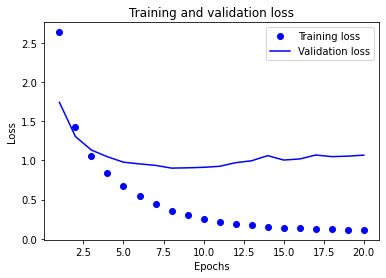

In [14]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

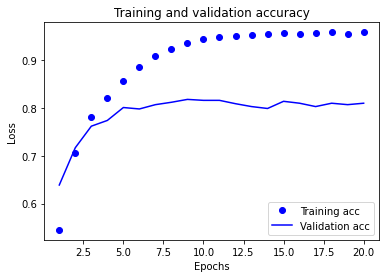

In [18]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Retraining from scratch

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 65ms/step - loss: 3.2593 - accuracy: 0.3832 - val_loss: 1.9121 - val_accuracy: 0.6410
Epoch 2/9
16/16 [==============================] - 1s 46ms/step - loss: 1.6484 - accuracy: 0.6859 - val_loss: 1.3738 - val_accuracy: 0.7130
Epoch 3/9
16/16 [==============================] - 1s 48ms/step - loss: 1.1575 - accuracy: 0.7657 - val_loss: 1.1552 - val_accuracy: 0.7650
Epoch 4/9
16/16 [==============================] - 1s 46ms/step - loss: 0.9057 - accuracy: 0.8161 - val_loss: 1.0413 - val_accuracy: 0.7900
Epoch 5/9
16/16 [==============================] - 1s 47ms/step - loss: 0.7002 - accuracy: 0.8566 - val_loss: 1.0042 - val_accuracy: 0.7860
Epoch 6/9
16/16 [==============================] - 1s 47ms/step - loss: 0.5837 - accuracy: 0.8821 - val_loss: 0.9405 - val_accuracy: 0.8020
Epoch 7/9
16/16 [==============================] - 1s 47ms/step - loss: 0.4628 - accuracy: 0.9094 - val_loss: 0.9098 - val_accuracy: 0.8140
Epoch 8/9
16/16 [===

Generating predictions for new data

In [20]:
predictions = model.predict(x_test)

In [21]:
predictions[0].shape

(46,)

In [22]:
np.sum(predictions[0])

1.0000001

In [23]:
np.argmax(predictions[0])

3

Different way to handle labels and loss

In [24]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [25]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['acc'])

Information bottleneck

In [26]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 21ms/step - loss: 3.4705 - accuracy: 0.0683 - val_loss: 2.4968 - val_accuracy: 0.2780
Epoch 2/20
63/63 [==============================] - 1s 16ms/step - loss: 2.1634 - accuracy: 0.3808 - val_loss: 1.6321 - val_accuracy: 0.5990
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 1.4218 - accuracy: 0.6440 - val_loss: 1.4183 - val_accuracy: 0.6620
Epoch 4/20
63/63 [==============================] - 1s 16ms/step - loss: 1.1728 - accuracy: 0.7012 - val_loss: 1.3294 - val_accuracy: 0.6820
Epoch 5/20
63/63 [==============================] - 1s 16ms/step - loss: 1.0544 - accuracy: 0.7269 - val_loss: 1.2941 - val_accuracy: 0.7020
Epoch 6/20
63/63 [==============================] - 1s 16ms/step - loss: 0.9356 - accuracy: 0.7518 - val_loss: 1.2792 - val_accuracy: 0.7250
Epoch 7/20
63/63 [==============================] - 1s 16ms/step - loss: 0.8177 - accuracy: 0.7940 - val_loss: 1.2704 - val_accuracy: 0.7260
Epoch 8/20
63